# MLP Classifier using Wi-Fi data

<p>Jupyter Notebook which aims to explore the ML algorithm Multi-Layer Perceptron as a Classifier algorithm using the Wi-Fi technology moreover using the strength of the signal as a basis. </p>

## Imports
Imports of the libraries to be used throughout the experiments

In [1]:
#CSV Related
import pandas as pd
import csv

# Machine Learning
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.pipeline import make_pipeline
import scipy

#Warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

#Graphical Display
%matplotlib inline
from IPython.display import display, HTML
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

#Additional Helper Libraries
from operator import itemgetter
import re

## Load File and Structure Data Function
Function to load csv and structure data accordingly

In [2]:
#Function that reads a csv file and structures the data accordingly
def load_file(filename):
    dataset = pd.read_csv(filename)
    return dataset

## Initialize Training Data

In [3]:
def find_beacon_index():
    first_beacon_index = -1
    for ap in dataset.iloc[:,4:]:
        if ap.islower() == False:
            first_beacon_index = list(dataset).index(ap)
            break
    return first_beacon_index

In [4]:
dataset = load_file('../radiomapBluetoothWiFiclassifier.csv')
beacon_index = find_beacon_index()
X_train = dataset.iloc[:,4:beacon_index]
Y_train = dataset.iloc[:,3:4]
nan_filler = X_train.min().min()*1.010
X_train = X_train.replace(0, np.nan)
X_train = X_train.fillna(nan_filler)
display(X_train.shape)
display(Y_train.shape)
display(dataset.describe().transpose())
n_features = X_train.shape[1]
display(n_features)

(120, 15)

(120, 1)

,count,mean,std,min,25%,50%,75%,max
Fingerprint ID,120.0,64.250000,36.047646,4.0,33.75,63.5,93.25,132.0
coordinate_X,120.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
coordinate_Y,120.0,0.000000,0.000000,0.0,0.00,0.0,0.00,0.0
c4:e9:84:42:ac:ff,120.0,-67.833333,11.998833,-81.0,-73.00,-69.0,-65.00,0.0
00:26:5b:d1:93:38,120.0,-14.916667,30.767107,-80.0,0.00,0.0,0.00,0.0
00:06:91:d4:77:02,120.0,-58.416667,20.832499,-78.0,-70.00,-62.0,-56.00,0.0
00:26:5b:d1:93:39,120.0,-15.000000,30.936639,-80.0,0.00,0.0,0.00,0.0
8c:5b:f0:78:a1:d6,120.0,-63.508333,11.451759,-79.0,-67.00,-65.0,-63.00,0.0
00:06:91:d4:77:00,120.0,-57.066667,21.986525,-78.0,-69.00,-61.0,-56.00,0.0
0c:47:3d:13:88:e8,120.0,-7.200000,21.755169,-80.0,0.00,0.0,0.00,0.0


15

## Access Points Graphical Display
Graphical display with the average strength signal transmitted by each access point

<BarContainer object of 15 artists>

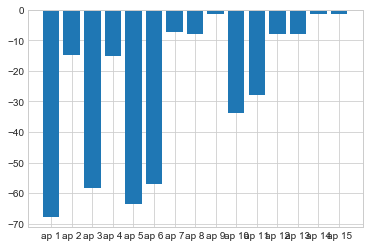

In [5]:
count_aps = {}
counter = 1
first_beacon_index = -1
for ap in X_train:
    mean_value = dataset[ap].mean()
    count_aps['ap ' + str(counter)] = mean_value
    counter = counter + 1
plt.bar(range(len(count_aps)),list(count_aps.values()),align='center',tick_label=list(count_aps.keys()))

## Number of Fingerprints per Reference Point Graphical Display
Graphical display of the number of fingerprints retrieved at each reference point

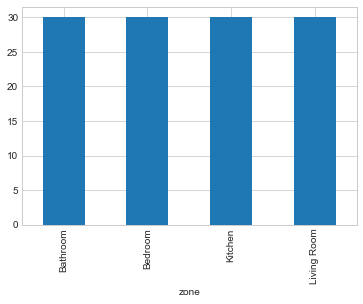

In [6]:
reference_points = dataset.groupby(['zone'])
reference_points.size().plot(kind="bar")

## Signal Strength Distribution Display
Graphical display of the distribution of the signal strength

### Wifi Signal Strength

Text(0, 0.5, 'Probability')

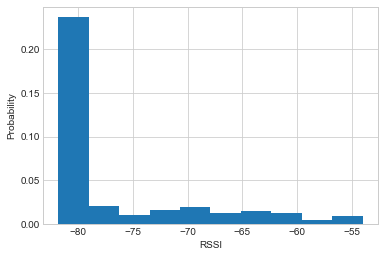

In [7]:
flatten_results = X_train.values.flatten().tolist()
plt.hist(flatten_results,density=True)
plt.xlabel('RSSI')
plt.ylabel('Probability')

## Initialize MLP Parameters arrays
Initialization of the arrays with the different possible values for the parameters of MLP Classifier function

In [8]:
#MLP Configurable Arrays
activation_function_list = ['logistic','tanh','relu'] 
solver_list = ['lbfgs','sgd','adam']
filters_list = ["Median","Mean","No Filter"]
learning_rate_list = ['constant','invscaling','adaptive']
alpha_list = [0.0001,0.001,1e-05,0.1]
number_iterations_list = [200,400,500,1000,2000]
scaler_list = [StandardScaler(),MinMaxScaler(),MaxAbsScaler(),None]
momentum_list = [0,0.9]
default_data_scenario = Y_train.copy()
default_data_scenario_groups = default_data_scenario["zone"].map(str)

## Statistics Output Format
Structure of the statistical output of each call to the MLP Classification Function

In [9]:
def structure_data(data,precision,accuracy,f1score):
    mae = data['error'].abs().mean()
    mse = np.power(data['error'],2).mean()
    rsme = np.sqrt(mse)
    precision = precision
    accuracy = accuracy
    f1score = f1score
    statistical_results = [mae,mse,rsme,precision,accuracy,f1score]
    return statistical_results

## Configurable MLP Classifier Function 

In [10]:
def compute_MLP_with_Classification(number_features = n_features,flag = 1,trainX_data = None,trainY_data = None,testX_data = None,testY_data = None,scaler = StandardScaler(),
                                    cross_validation = None,activation_function='relu',solver_function='adam',
                                    learning_rate_value='constant',momentum_value = 0.9,alpha_value = 0.0001 ,max_iterations = 1000):
    # Init the NN Classifier
    mlp_classifier_estimator = MLPClassifier(hidden_layer_sizes=(number_features,number_features,number_features),
                                            activation=activation_function,solver=solver_function,max_iter=max_iterations,
                                            learning_rate=learning_rate_value,momentum=momentum_value,
                                             alpha=alpha_value,random_state=6
                                            )
    if scaler is not None:
        # Make pipeline using scaler transformation
        main_estimator = make_pipeline(scaler,mlp_classifier_estimator)
    else:
        main_estimator = mlp_classifier_estimator
    if cross_validation is None:
        # Fit the training data
        main_estimator.fit(trainX_data,trainY_data.values.ravel())
        # Predict the results of the testing data features
        predict_test = main_estimator.predict(testX_data)
        matrix = confusion_matrix(testY_data, predict_test)
        report = classification_report(testY_data, predict_test,output_dict=True)
        accuracy = accuracy_score(testY_data,predict_test)
    else:
        predict_test = cross_val_predict(main_estimator,testX_data.values,testY_data.values.ravel(),cv = cross_validation,groups=default_data_scenario_groups)
        matrix = confusion_matrix(testY_data, predict_test)
        report = classification_report(testY_data, predict_test,output_dict=True)
        accuracy = accuracy_score(testY_data,predict_test)
    # Structure data to statistics
    statistics = pd.DataFrame(report).transpose()
    statistical_array = list()
    coord_cols = ['zone']
    predictions = pd.DataFrame(predict_test,columns=coord_cols)
    result = testY_data.join(predictions, rsuffix="_predicted")
    error = pd.DataFrame(np.where(predictions[coord_cols] != result[coord_cols],1,0), columns=["error"])
    result = pd.concat([result,error], axis = 1)
    if flag == 0:
        print("Confusion Matrix:")
        print(matrix)
        display(statistics)
        display(result)
    return structure_data(result,statistics['precision'].mean(),accuracy,statistics['f1-score'].mean())

## Experiments

### 1st Experiment - Running MLP function with default parameters and testing data equal to training data

In [11]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score']
result = compute_MLP_with_Classification(flag=0,
                                         trainX_data=X_train,trainY_data=Y_train,
                                         testX_data=X_train,testY_data=Y_train,
                                         scaler=StandardScaler())
statistical_results = [result]
statistics = pd.DataFrame(columns=statistical_cols,data=statistical_results)
display(statistics)

Confusion Matrix:
[[30  0  0  0]
 [ 0 30  0  0]
 [ 0  0 30  0]
 [ 0  0  0 30]]


,precision,recall,f1-score,support
Bathroom,1.0,1.0,1.0,30.0
Bedroom,1.0,1.0,1.0,30.0
Kitchen,1.0,1.0,1.0,30.0
Living Room,1.0,1.0,1.0,30.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,120.0
weighted avg,1.0,1.0,1.0,120.0


,zone,zone_predicted,error
0,Kitchen,Kitchen,0
1,Kitchen,Kitchen,0
2,Kitchen,Kitchen,0
3,Kitchen,Kitchen,0
4,Kitchen,Kitchen,0
...,...,...,...
115,Bathroom,Bathroom,0
116,Bathroom,Bathroom,0
117,Bathroom,Bathroom,0
118,Bathroom,Bathroom,0


,mae,mse,rmse,precision,accuracy,f1-score
0,0.0,0.0,0.0,1.0,1.0,1.0


### 2nd Experiment - Tunning parameters with GridSearchCV

In [12]:
def tune_parameters():
    results = []
    tuned_parameters = {
        'mlp__activation':activation_function_list,
        'mlp__solver':solver_list,
        'mlp__alpha': alpha_list,
        'mlp__max_iter':number_iterations_list
    }
    sgd_parameters = {
        'mlp__learning_rate':learning_rate_list,
        'mlp__momentum':momentum_list,
        'mlp__alpha': alpha_list,
        'mlp__max_iter':number_iterations_list
    }
    scores = ['precision', 'recall','f1']
    for score in scores:
        pipe = Pipeline([('standardizer', StandardScaler()), ('mlp', MLPClassifier())])
        clf = GridSearchCV(
           pipe, tuned_parameters, scoring='%s_macro' % score,n_jobs=-1
        )
        clf.fit(X_train,Y_train.values.ravel())
        clf.best_params_['score'] = score
        results.append(clf.best_params_)
    gridcv_results = pd.DataFrame(results)
    display(gridcv_results)
    results=[]
    for score in scores:
        pipe = Pipeline([('standardizer', StandardScaler()), ('mlp', MLPClassifier())])
        clf = GridSearchCV(
           pipe, sgd_parameters, scoring='%s_macro' % score,n_jobs=-1
        )
        clf.fit(X_train,Y_train.values.ravel())
        clf.best_params_['score'] = score
        results.append(clf.best_params_)
    gridcv_results = pd.DataFrame(results)
    display(gridcv_results)

In [13]:
tune_parameters()

,mlp__activation,mlp__alpha,mlp__max_iter,mlp__solver,score
0,relu,0.1000,400,lbfgs,precision
1,logistic,0.0010,2000,sgd,recall
2,logistic,0.0001,2000,sgd,f1


,mlp__alpha,mlp__learning_rate,mlp__max_iter,mlp__momentum,score
0,0.10000,adaptive,400,0.0,precision
1,0.00001,adaptive,200,0.9,recall
2,0.10000,adaptive,200,0.9,f1


### 3th Experiment - Running the MLP function with default parameters and Hold-out Cross Validation

,mae,mse,rmse,precision,accuracy,f1-score,test_size
4,0.033333,0.033333,0.182574,0.967560,0.966667,0.966651,0.5
3,0.041667,0.041667,0.204124,0.959707,0.958333,0.958302,0.4
2,0.055556,0.055556,0.235702,0.946825,0.944444,0.944371,0.3
6,0.059524,0.059524,0.243975,0.944504,0.940476,0.941032,0.7
5,0.069444,0.069444,0.263523,0.935870,0.930556,0.931274,0.6
0,0.083333,0.083333,0.288675,0.934524,0.916667,0.914626,0.1
1,0.083333,0.083333,0.288675,0.921769,0.916667,0.916417,0.2
7,0.083333,0.083333,0.288675,0.927381,0.916667,0.917812,0.8
8,0.407407,0.407407,0.638285,0.620370,0.592593,0.575587,0.9


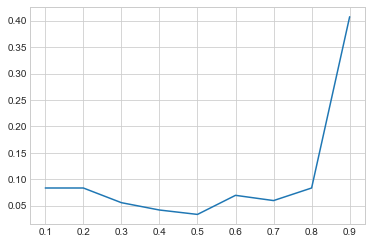

In [14]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score']
test_sizes =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
results = list()
for size in test_sizes:
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train,Y_train, test_size = size, random_state = 6,stratify=default_data_scenario_groups)
    X_train_split = X_train_split.reset_index(drop=True)
    X_test_split = X_test_split.reset_index(drop=True)
    y_train_split = y_train_split.reset_index(drop=True)
    y_test_split = y_test_split.reset_index(drop=True)
    result = compute_MLP_with_Classification(trainX_data=X_train_split,trainY_data=y_train_split,
                                             testX_data=X_test_split,testY_data=y_test_split,
                                             scaler=StandardScaler())
    result.append(size)
    results.append(result)
statistical_cols.append('test_size')
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae'],))
plt.plot(statistics['test_size'],statistics['mae'])

### 4th Experiment -  Running the MLP function with default parameters and Stratified K-Fold cross validation

,mae,mse,rmse,precision,accuracy,f1-score,folds
8,0.066667,0.066667,0.258199,0.933487,0.933333,0.933079,10
5,0.075000,0.075000,0.273861,0.925548,0.925000,0.924720,7
6,0.083333,0.083333,0.288675,0.916029,0.916667,0.915912,8
7,0.083333,0.083333,0.288675,0.916865,0.916667,0.916657,9
4,0.091667,0.091667,0.302765,0.910922,0.908333,0.907932,6
2,0.108333,0.108333,0.329140,0.891595,0.891667,0.890754,4
3,0.125000,0.125000,0.353553,0.877201,0.875000,0.873974,5
0,0.275000,0.275000,0.524404,0.722126,0.725000,0.719206,2
1,0.458333,0.458333,0.677003,0.562089,0.541667,0.546055,3


Number of Folds:  10


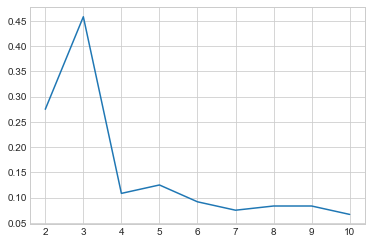

In [15]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score']
cross_validation_list = np.arange(2,11)
results = list()
for cv in cross_validation_list:
    result = compute_MLP_with_Classification(testX_data=X_train,testY_data=Y_train,
                                             scaler=StandardScaler(),
                                             cross_validation = cv)  
    result.append(cv)
    results.append(result)
statistical_cols.append('folds')
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
plt.plot(statistics['folds'],statistics['mae'])
selected_fold = statistics.sort_values(by=['mae'])['folds'].head(1).values[0]
print("Number of Folds: ",selected_fold)

### 5th Experiment -  Running the MLP function with default parameters and Leave One Group Out cross validation

In [16]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score']
results = list()
cv = LeaveOneGroupOut()
splited = cv.split(X_train,default_data_scenario_groups,groups=default_data_scenario_groups)
loo = compute_MLP_with_Classification(testX_data=X_train,testY_data=Y_train,
                                      scaler=StandardScaler(),
                                      cross_validation = splited)  
results.append(loo)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))

,mae,mse,rmse,precision,accuracy,f1-score
0,1.0,1.0,1.0,0.0,0.0,0.0


### 6th Experiment - Compare cross validation methods

,mae,mse,rmse,precision,accuracy,f1-score,method
2,0.066667,0.066667,0.258199,0.933487,0.933333,0.933079,Stratified K-Fold
1,0.407407,0.407407,0.638285,0.620370,0.592593,0.575587,HoldOut
0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,LOO


Selected cross validation method:  Stratified K-Fold


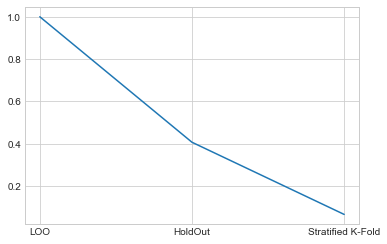

In [17]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','method']
results = list()
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train,Y_train, test_size = size, random_state = 6,stratify=default_data_scenario_groups)
X_train_split = X_train_split.reset_index(drop=True)
X_test_split = X_test_split.reset_index(drop=True)
y_train_split = y_train_split.reset_index(drop=True)
y_test_split = y_test_split.reset_index(drop=True)
holdout = compute_MLP_with_Classification(trainX_data=X_train_split,trainY_data=y_train_split,
                                          testX_data=X_test_split,testY_data=y_test_split,
                                          scaler=StandardScaler())
loo.append('LOO')
results.append(loo)
holdout.append('HoldOut')
results.append(holdout)
skfold = compute_MLP_with_Classification(testX_data=X_train,testY_data=Y_train,
                                         scaler=StandardScaler(),
                                         cross_validation = selected_fold)
skfold.append('Stratified K-Fold')
results.append(skfold)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
plt.plot(statistics['method'],statistics['mae'])
selected_method = statistics.sort_values(by=['mae'])['method'].head(1).values[0]
print("Selected cross validation method: ",selected_method)

### 7th Experiment - Running the MLP function with the different activation functions

,mae,mse,rmse,precision,accuracy,f1-score,activation_function
2,0.066667,0.066667,0.258199,0.933487,0.933333,0.933079,relu
0,0.075000,0.075000,0.273861,0.925642,0.925000,0.924976,logistic
1,0.075000,0.075000,0.273861,0.926722,0.925000,0.925429,tanh


Selected Activation Function:  relu


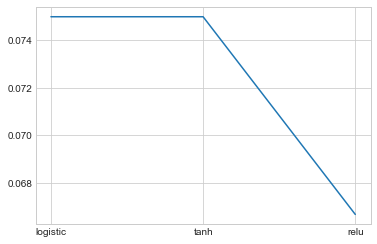

In [18]:
statistical_cols =['mae','mse','rmse','precision','accuracy','f1-score','activation_function']
results = list()
for function in activation_function_list:
    if selected_method == 'LOO':
        cv = LeaveOneGroupOut()
        splited = cv.split(X_train,Y_train,groups=default_data_scenario_groups)
        result = compute_MLP_with_Classification(testX_data=X_train,testY_data=Y_train,
                                                 scaler=StandardScaler(),
                                                 cross_validation = splited,
                                                 activation_function=function)                                           
    elif selected_method =='Stratified K-Fold':
        result = compute_MLP_with_Classification(testX_data=X_train,testY_data=Y_train,
                                                 scaler=StandardScaler(),
                                                 cross_validation = selected_fold,
                                                 activation_function= function) 
    else:
        result = compute_MLP_with_Classification(trainX_data=X_train_split,trainY_data=y_train_split,
                                                 testX_data=X_test_split,testY_data=y_test_split,
                                                 scaler=StandardScaler(),
                                                 activation_function=function) 
    result.append(function)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
plt.plot(statistics['activation_function'],statistics['mae'])
selected_activation_function= statistics.sort_values(by=['mae'])['activation_function'].head(1).values[0]
print("Selected Activation Function: ",selected_activation_function)

### 8th Experiment - Running the MLP function with the different preprocessing methods

,mae,mse,rmse,precision,accuracy,f1-score,preprocessing,preprocessingFunc
2,0.016667,0.016667,0.129099,0.983564,0.983333,0.983331,MaxAbsScaler,MaxAbsScaler(copy=True)
1,0.050000,0.050000,0.223607,0.951770,0.950000,0.950322,MinMaxScaler,"MinMaxScaler(copy=True, feature_range=(0, 1))"
0,0.066667,0.066667,0.258199,0.933487,0.933333,0.933079,StandardScaler,"StandardScaler(copy=True, with_mean=True, with..."
3,0.066667,0.066667,0.258199,0.935519,0.933333,0.933388,None,None


Selected Preprocessing:  MaxAbsScaler


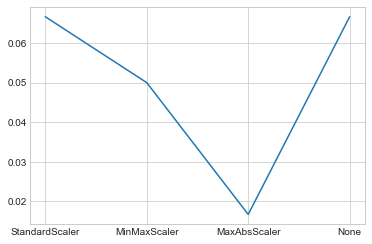

In [19]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score','preprocessing','preprocessingFunc']
results = list()
for preprocess in scaler_list:
    if selected_method == 'LOO':
        cv = LeaveOneGroupOut()
        splited = cv.split(X_train,Y_train,groups=default_data_scenario_groups)
        result = compute_MLP_with_Classification(testX_data=X_train,testY_data=Y_train,
                                                 scaler=preprocess,
                                                 cross_validation = splited)  
    elif selected_method =='Stratified K-Fold':
        result = compute_MLP_with_Classification(testX_data=X_train,testY_data=Y_train,
                                                 scaler=preprocess,
                                                 cross_validation = selected_fold)
    else:
        result = compute_MLP_with_Classification(trainX_data=X_train_split,trainY_data=y_train_split,
                                                 testX_data=X_test_split,testY_data=y_test_split,
                                                 scaler=preprocess)
    if(preprocess is None):
        regex = 'None'
    else:
        regex = re.search('(\w+)\(',str(preprocess)).group(1)
    result.append(regex)
    result.append(preprocess)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
plt.plot(statistics['preprocessing'],statistics['mae'])
selected_preprocessing = statistics.sort_values(by=['mae'])['preprocessing'].head(1).values[0]
selected_preprocesssing_func = statistics.sort_values(by=['mae'])['preprocessingFunc'].head(1).values[0]
print("Selected Preprocessing: ",selected_preprocessing)

### 9th Experiment - Running the MLP function with the different solvers

,mae,mse,rmse,precision,accuracy,f1-score,solvers
1,0.041667,0.041667,0.204124,0.960421,0.958333,0.958631,sgd
2,0.066667,0.066667,0.258199,0.933487,0.933333,0.933079,adam
0,0.100000,0.100000,0.316228,0.903571,0.900000,0.900362,lbfgs


Selected Solver:  sgd


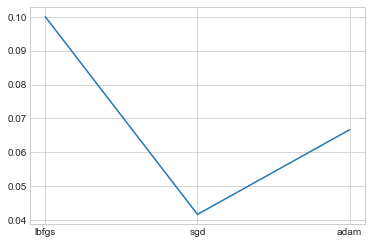

In [20]:
statistical_cols =['mae','mse','rmse','precision','accuracy','f1-score','solvers']
results = list()
for solver in solver_list:
    if selected_method == 'LOO':
        cv = LeaveOneGroupOut()
        splited = cv.split(X_train,Y_train,groups=default_data_scenario_groups)
        result = compute_MLP_with_Classification(testX_data=X_train,testY_data=Y_train,
                                                 scaler=StandardScaler(),
                                                 cross_validation = splited,
                                                 solver_function=solver)                                           
    elif selected_method =='Stratified K-Fold':
        result = compute_MLP_with_Classification(testX_data=X_train,testY_data=Y_train,
                                                 scaler=StandardScaler(),
                                                 cross_validation = selected_fold,
                                                 solver_function=solver) 
    else:
        result = compute_MLP_with_Classification(trainX_data=X_train_split,trainY_data=y_train_split,
                                                 testX_data=X_test_split,testY_data=y_test_split,
                                                 scaler=StandardScaler(),
                                                 solver_function=solver) 
    result.append(solver)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
plt.plot(statistics['solvers'],statistics['mae'])
selected_solver= statistics.sort_values(by=['mae'])['solvers'].head(1).values[0]
print("Selected Solver: ",selected_solver)

### 10th Experiment - Running the MLP function with the different learning rate metrics

,mae,mse,rmse,precision,accuracy,f1-score,learning_rates
0,0.041667,0.041667,0.204124,0.960421,0.958333,0.958631,constant
2,0.041667,0.041667,0.204124,0.960421,0.958333,0.958631,adaptive
1,0.966667,0.966667,0.983192,0.019302,0.033333,0.024031,invscaling


Selected Learning Rate:  constant


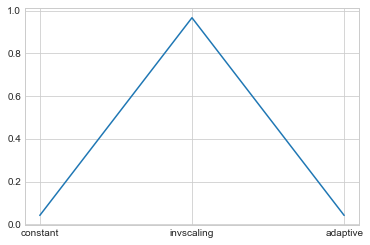

In [21]:
statistical_cols =['mae','mse','rmse','precision','accuracy','f1-score','learning_rates']
results = list()
for rate in learning_rate_list:
    if selected_method == 'LOO':
        cv = LeaveOneGroupOut()
        splited = cv.split(X_train,Y_train,groups=default_data_scenario_groups)
        result = compute_MLP_with_Classification(testX_data=X_train,testY_data=Y_train,
                                                 scaler=StandardScaler(),
                                                 cross_validation = splited,
                                                 solver_function='sgd',
                                                 learning_rate_value=rate)                                           
    elif selected_method =='Stratified K-Fold':
        result = compute_MLP_with_Classification(testX_data=X_train,testY_data=Y_train,
                                                 scaler=StandardScaler(),
                                                 cross_validation = selected_fold,
                                                 solver_function='sgd',
                                                 learning_rate_value=rate) 
    else:
        result = compute_MLP_with_Classification(trainX_data=X_train_split,trainY_data=y_train_split,
                                                 testX_data=X_test_split,testY_data=y_test_split,
                                                 scaler=StandardScaler(),
                                                 solver_function='sgd',
                                                 learning_rate_value=rate) 
    result.append(rate)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
plt.plot(statistics['learning_rates'],statistics['mae'])
selected_learning_rate= statistics.sort_values(by=['mae'])['learning_rates'].head(1).values[0]
print("Selected Learning Rate: ",selected_learning_rate)

### 11th Experiment:  Running the MLP function with the different momentum metrics

,mae,mse,rmse,precision,accuracy,f1-score,momentum
1,0.041667,0.041667,0.204124,0.960421,0.958333,0.958631,0.9
0,0.366667,0.366667,0.605530,0.747703,0.633333,0.583106,0.0


Selected Momentum:  0.9


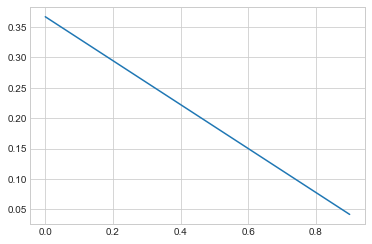

In [22]:
statistical_cols =['mae','mse','rmse','precision','accuracy','f1-score','momentum']
results = list()
for momentum in momentum_list:
    if selected_method == 'LOO':
        cv = LeaveOneGroupOut()
        splited = cv.split(X_train,Y_train,groups=default_data_scenario_groups)
        result = compute_MLP_with_Classification(testX_data=X_train,testY_data=Y_train,
                                                 scaler=StandardScaler(),
                                                 cross_validation = splited,
                                                 solver_function='sgd',
                                                 momentum_value=momentum)                                           
    elif selected_method =='Stratified K-Fold':
        result = compute_MLP_with_Classification(testX_data=X_train,testY_data=Y_train,
                                                 scaler=StandardScaler(),
                                                 cross_validation = selected_fold,
                                                 solver_function='sgd',
                                                 momentum_value=momentum) 
    else:
        result = compute_MLP_with_Classification(trainX_data=X_train_split,trainY_data=y_train_split,
                                                 testX_data=X_test_split,testY_data=y_test_split,
                                                 scaler=StandardScaler(),
                                                 solver_function='sgd',
                                                 momentum_value=momentum) 
    result.append(momentum)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
plt.plot(statistics['momentum'],statistics['mae'])
selected_momentum= statistics.sort_values(by=['mae'])['momentum'].head(1).values[0]
print("Selected Momentum: ",selected_momentum)

### 12th Experiment:  Running the MLP function with the different alpha value metrics

,mae,mse,rmse,precision,accuracy,f1-score,alpha
3,0.058333,0.058333,0.241523,0.942230,0.941667,0.941390,0.10000
0,0.066667,0.066667,0.258199,0.933487,0.933333,0.933079,0.00010
1,0.066667,0.066667,0.258199,0.933487,0.933333,0.933079,0.00100
2,0.066667,0.066667,0.258199,0.933487,0.933333,0.933079,0.00001


Selected Alpha:  0.1


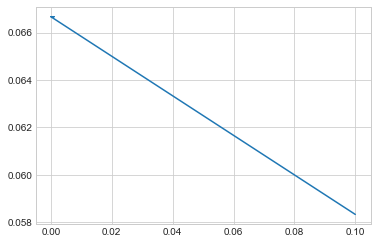

In [23]:
statistical_cols =['mae','mse','rmse','precision','accuracy','f1-score','alpha']
results = list()
for alpha in alpha_list:
    if selected_method == 'LOO':
        cv = LeaveOneGroupOut()
        splited = cv.split(X_train,Y_train,groups=default_data_scenario_groups)
        result = compute_MLP_with_Classification(testX_data=X_train,testY_data=Y_train,
                                                 scaler=StandardScaler(),
                                                 cross_validation = splited,
                                                 alpha_value=alpha)                                           
    elif selected_method =='Stratified K-Fold':
        result = compute_MLP_with_Classification(testX_data=X_train,testY_data=Y_train,
                                                 scaler=StandardScaler(),
                                                 cross_validation = selected_fold,
                                                 alpha_value=alpha) 
    else:
        result = compute_MLP_with_Classification(trainX_data=X_train_split,trainY_data=y_train_split,
                                                 testX_data=X_test_split,testY_data=y_test_split,
                                                 scaler=StandardScaler(),
                                                 alpha_value=alpha) 
    result.append(alpha)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
plt.plot(statistics['alpha'],statistics['mae'])
selected_alpha= statistics.sort_values(by=['mae'])['alpha'].head(1).values[0]
print("Selected Alpha: ",selected_alpha)

### 13th Experiment:  Running the MLP function with the different iteration metrics

,mae,mse,rmse,precision,accuracy,f1-score,max_iter
1,0.050000,0.050000,0.223607,0.950400,0.950000,0.949867,400
0,0.058333,0.058333,0.241523,0.942096,0.941667,0.941774,200
2,0.058333,0.058333,0.241523,0.942230,0.941667,0.941390,500
3,0.066667,0.066667,0.258199,0.933487,0.933333,0.933079,1000
4,0.066667,0.066667,0.258199,0.933487,0.933333,0.933079,2000


Selected Maximum iterations:  400


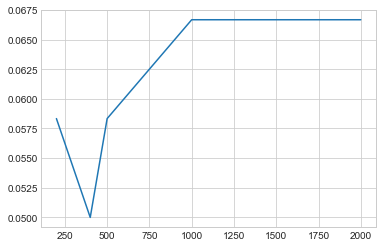

In [24]:
statistical_cols =['mae','mse','rmse','precision','accuracy','f1-score','max_iter']
results = list()
for iteration in number_iterations_list:
    if selected_method == 'LOO':
        cv = LeaveOneGroupOut()
        splited = cv.split(X_train,Y_train,groups=default_data_scenario_groups)
        result = compute_MLP_with_Classification(testX_data=X_train,testY_data=Y_train,
                                                 scaler=StandardScaler(),
                                                 cross_validation = splited,
                                                 max_iterations=iteration)                                           
    elif selected_method =='Stratified K-Fold':
        result = compute_MLP_with_Classification(testX_data=X_train,testY_data=Y_train,
                                                 scaler=StandardScaler(),
                                                 cross_validation = selected_fold,
                                                 max_iterations=iteration) 
    else:
        result = compute_MLP_with_Classification(trainX_data=X_train_split,trainY_data=Y_train_split,
                                                 testX_data=X_test_split,testY_data=Y_test_split,
                                                 scaler=StandardScaler(),
                                                 max_iterations=iteration) 
    result.append(iteration)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
plt.plot(statistics['max_iter'],statistics['mae'])
selected_max_iterartions= statistics.sort_values(by=['mae'])['max_iter'].head(1).values[0]
print("Selected Maximum iterations: ",selected_max_iterartions)

### 14th Experiment: Running the KNN function with data filtered 

In [25]:
def apply_filter():
    statistical_cols =  ['mae','mse','rmse','precision','accuracy','f1-score','filter']
    results = list()
    for filterelement in filters_list:
        if filterelement == 'Median':
            result = apply_median_filter()
        elif filterelement == 'Mean':
            result = apply_mean_filter()
        else:
            result = compute_MLP_with_Classification(trainX_data=X_train,trainY_data=Y_train,
                                                 testX_data=X_train,testY_data=Y_train,
                                                 scaler=selected_preprocesssing_func,
                                                 cross_validation = selected_fold,
                                                 activation_function=selected_activation_function,
                                                 solver_function=selected_solver,
                                                 learning_rate_value=selected_learning_rate,
                                                 momentum_value=selected_momentum,
                                                 alpha_value=selected_alpha,
                                                 max_iterations=selected_max_iterartions)
            result.append('No Filter')
        results.append(result)
    statistics = pd.DataFrame(columns=statistical_cols,data=results)
    display(statistics.sort_values(by=['mae']))
    plt.plot(statistics['filter'],statistics['mae'])
    selected_filter = statistics.sort_values(by=['mae'])['filter'].head(1).values[0]
    print("Selected Filter: ",selected_filter)
    return selected_filter
            

def apply_median_filter():
    medians = list()
    aps = ['zone']
    for col in X_train.columns: 
         aps.append(col)
    for rp, access_points in reference_points:
        zone = rp
        medians_list = [rp]
        for ap in X_train:
            median = access_points[ap].median()
            medians_list.append(median)
        medians.append(medians_list)
    median_pd = pd.DataFrame(medians,columns = aps)
    x_train = median_pd.iloc[:,1:]
    y_train = median_pd.iloc[:,0:1]
    nan_filler = x_train.min().min()*1.010
    x_train = x_train.replace(0, np.nan)
    x_train = x_train.fillna(nan_filler)
    result = compute_MLP_with_Classification(trainX_data=X_train,trainY_data=Y_train,
                                                 testX_data=X_train,testY_data=Y_train,
                                                 scaler=selected_preprocesssing_func,
                                                 activation_function=selected_activation_function,
                                                 solver_function=selected_solver,
                                                 learning_rate_value=selected_learning_rate,
                                                 momentum_value=selected_momentum,
                                                 alpha_value=selected_alpha,
                                                 max_iterations=selected_max_iterartions)
    result.append('Median')
    return result

def apply_mean_filter(): 
    means = list()
    aps = ['zone']
    for col in X_train.columns: 
         aps.append(col)
    for rp, access_points in reference_points:
        zone = rp
        means_list = [zone]
        for ap in X_train:
            mean = access_points[ap].mean()
            means_list.append(mean)
        means.append(means_list)
    mean_pd = pd.DataFrame(means,columns = aps)
    x_train = mean_pd.iloc[:,1:]
    y_train = mean_pd.iloc[:,0:1]
    nan_filler = x_train.min().min()*1.010
    x_train = x_train.replace(0, np.nan)
    x_train = x_train.fillna(nan_filler)
    result = compute_MLP_with_Classification(trainX_data=X_train,trainY_data=Y_train,
                                                 testX_data=X_train,testY_data=Y_train,
                                                 scaler=selected_preprocesssing_func,
                                                 activation_function=selected_activation_function,
                                                 solver_function=selected_solver,
                                                 learning_rate_value=selected_learning_rate,
                                                 momentum_value=selected_momentum,
                                                 alpha_value=selected_alpha,
                                                 max_iterations=selected_max_iterartions)
    result.append('Mean')
    return result

,mae,mse,rmse,precision,accuracy,f1-score,filter
0,0.783333,0.783333,0.885061,0.078982,0.216667,0.107273,Median
1,0.783333,0.783333,0.885061,0.078982,0.216667,0.107273,Mean
2,0.800000,0.800000,0.894427,0.099362,0.200000,0.109266,No Filter


Selected Filter:  Median


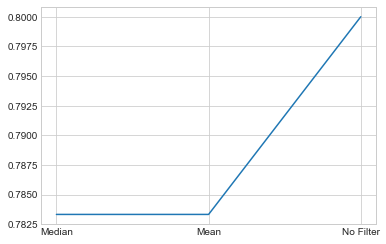

In [26]:
selected_filter = apply_filter()

# Results Analysis and Conclusion
Analysis of the outcomes of the different experiments and final conclusions.

In [27]:
conclusion_cols=['Activation Function','Cross Validation','Solver','Preprocessing','Alpha','Learning Rate','Momentum','Iterations','Filtering']
conclusion_list = [selected_activation_function,selected_method,selected_solver,selected_preprocessing,selected_alpha,
                   selected_learning_rate,selected_momentum,selected_max_iterartions,selected_filter]
conclusion_pd = pd.DataFrame([conclusion_list],columns= conclusion_cols)
display(conclusion_pd)
statistical_cols_csv = conclusion_cols
statistical_cols_csv.append('Experimentation')
result_csv = conclusion_list
result_csv.append('MLP Classifier Wifi')
results_csv = [result_csv]
results_df = pd.DataFrame(columns=statistical_cols_csv,data=results_csv)
results_df.to_csv('../parameters_neural_networks_results.csv',mode='a',index=False,header=False)

,Activation Function,Cross Validation,Solver,Preprocessing,Alpha,Learning Rate,Momentum,Iterations,Filtering
0,relu,Stratified K-Fold,sgd,MaxAbsScaler,0.1,constant,0.9,400,Median


### Best Result

In [28]:
statistical_cols = ['mae','mse','rmse','precision','accuracy','f1-score']
if selected_method == 'LOO':
    cv = LeaveOneGroupOut()
    splited = cv.split(X_train,Y_train,groups=default_data_scenario_groups)
    result = compute_MLP_with_Classification(trainX_data=X_train,trainY_data=Y_train,
                                                 testX_data=X_train,testY_data=Y_train,
                                                 scaler=selected_preprocesssing_func,
                                                 cross_validation = splited,
                                                 activation_function=selected_activation_function,
                                                 solver_function=selected_solver,
                                                 learning_rate_value=selected_learning_rate,
                                                 momentum_value=selected_momentum,
                                                 alpha_value=selected_alpha,
                                                 max_iterations=selected_max_iterartions)
elif selected_method =='Stratified K-Fold':
    result = compute_MLP_with_Classification(trainX_data=X_train,trainY_data=Y_train,
                                                 testX_data=X_train,testY_data=Y_train,
                                                 scaler=selected_preprocesssing_func,
                                                 cross_validation = selected_fold,
                                                 activation_function=selected_activation_function,
                                                 solver_function=selected_solver,
                                                 learning_rate_value=selected_learning_rate,
                                                 momentum_value=selected_momentum,
                                                 alpha_value=selected_alpha,
                                                 max_iterations=selected_max_iterartions) 
else:
    result = compute_MLP_with_Classification(trainX_data=X_train_split,trainY_data=y_train_split,
                                                 testX_data=X_test_split,testY_data=y_test_split,
                                                 scaler=selected_preprocesssing_func,
                                                 activation_function=selected_activation_function,
                                                 solver_function=selected_solver,
                                                 learning_rate_value=selected_learning_rate,
                                                 momentum_value=selected_momentum,
                                                 alpha_value=selected_alpha,
                                                 max_iterations=selected_max_iterartions)
results = [result]
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
statistical_cols_csv = ['mae','mse','rmse']
statistical_cols_csv.append('Experimentation')
result_csv = result[0:3]
result_csv.append('MLP Classifier Wifi')
results_csv = [result_csv]
results_df = pd.DataFrame(columns=statistical_cols_csv,data=results_csv)
results_df.to_csv('../tests_results.csv',mode='a',index=False,header=False)

,mae,mse,rmse,precision,accuracy,f1-score
0,0.8,0.8,0.894427,0.099362,0.2,0.109266
